# Todd Gurley Exploratory Data Analysis

Former LA Rams star running back, Todd Gurley, was released in March; the team had little cap space and the questions around Gurley's health remained a concern. The move was made just before \\$10.5m of his contract became fully guaranteed. He will, however, consume \\$20.15m in dead salary cap space for the Rams, despite the release. 

Todd Gurley had two great seasons under Sean McVay, being named the AP Offensive Player of the Year in 2017 and a big part of the 2018 Rams success in getting to the Super Bowl. 

A short while after being let go with the Rams, Gurley was signed by the Atlanta Falcons on a 1-year, \\$6 million contract, which could be good value for the Falcons. 

In this project I will be looking into Gurley's career statistics.

### Getting the data

I will be using the game log data from pro football reference

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
df = pd.read_csv('tg_gamelogs.csv')

In [3]:
df.head()

,Rk,Year,Date,G#,Week,Age,Tm,Unnamed: 7,Opp,Result,...,FF,FR,Yds.2,TD.3,Num,Pct,Num.1,Pct.1,Num.2,Pct.2
0,1.0,2015.0,27/09/2015,3.0,3.0,21.055,STL,NaN,PIT,L 6-12,...,0,0,0,0,14.0,28%,0.0,0%,0.0,0%
1,2.0,2015.0,04/10/2015,4.0,4.0,21.062,STL,@,ARI,W 24-22,...,0,0,0,0,36.0,68%,0.0,0%,0.0,0%
2,3.0,2015.0,11/10/2015,5.0,5.0,21.069,STL,@,GNB,L 10-24,...,0,0,0,0,45.0,64%,0.0,0%,0.0,0%
3,4.0,2015.0,25/10/2015,6.0,7.0,21.083,STL,NaN,CLE,W 24-6,...,0,0,0,0,36.0,68%,0.0,0%,0.0,0%
4,5.0,2015.0,01/11/2015,7.0,8.0,21.090,STL,NaN,SFO,W 27-6,...,0,0,0,0,36.0,52%,0.0,0%,0.0,0%


## Data Cleaning

In [4]:
df.columns

Index(['Rk', 'Year', 'Date', 'G#', 'Week', 'Age', 'Tm', 'Unnamed: 7', 'Opp',
       'Result', 'GS', 'Att', 'Yds', 'Y/A', 'TD', 'Tgt', 'Rec', 'Yds.1', 'Y/R',
       'TD.1', 'Ctch%', 'Y/Tgt', '2PM', 'TD.2', 'Pts', 'Fmb', 'FL', 'FF', 'FR',
       'Yds.2', 'TD.3', 'Num', 'Pct', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2'],
      dtype='object')

In [5]:
df.drop(['Rk', 'GS', 'Num.1', 'Pct.1', 'Num.2', 'Pct.2', 'FF', 'FR', 'Yds.2', 'TD.3', 'Y/A', 'Y/Tgt'], axis=1, inplace=True)

In [6]:
df.rename(columns={'Unnamed: 7':'Home/Away',
                  'TD':'RushingTD',
                  'TD.1':'ReceivingTD',
                  'TD.2':'TotalTD',
                  'Yds':'RushingYds',
                  'Yds.1':'ReceivingYds',
                  'Pct':'SnapPct',
                  'Num': 'NumSnaps'}, inplace=True)

In [7]:
df['Home/Away'] = df['Home/Away'].fillna('Home')
df['Home/Away'] = df['Home/Away'].replace('@','Away')

In [8]:
df['Score'] = df['Result'].str[2:]
df['Result'] = df['Result'].str[0]

In [9]:
df = df.head(73)

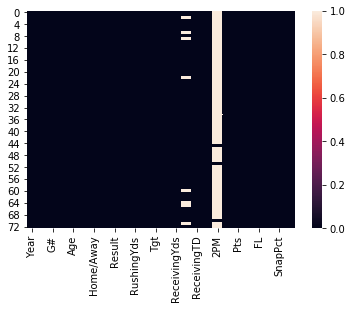

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.fillna(0, inplace = True)

In [12]:
#define touches as the sum of rushing attempts and receptions
df['Touches'] = df['Att'] + df['Rec']
#define usage as the sume of rushing attempts and passing targets
df['Usage'] = df['Att'] + df['Tgt']

In [13]:
df = df.set_index('Year')
df.index = df.index.astype('int32')

In [14]:
df.columns

Index(['Date', 'G#', 'Week', 'Age', 'Tm', 'Home/Away', 'Opp', 'Result', 'Att',
       'RushingYds', 'RushingTD', 'Tgt', 'Rec', 'ReceivingYds', 'Y/R',
       'ReceivingTD', 'Ctch%', '2PM', 'TotalTD', 'Pts', 'Fmb', 'FL',
       'NumSnaps', 'SnapPct', 'Score', 'Touches', 'Usage'],
      dtype='object')

In [15]:
df['TotalYds'] = df['RushingYds'] + df['ReceivingYds']

## Exploratory Data Analysis

In [16]:
GP = df.groupby(level=0).count()['Date']

In [17]:
year_df = df.groupby(df.index).sum()
year_df.drop(['Week', 'Age', 'G#'], axis=1, inplace=True)
year_df['G'] = GP
year_df['TotalYds/G'] = year_df['TotalYds']/year_df['G']
year_df['Touches/G'] = year_df['Touches']/year_df['G']
year_df['Yds/Touch'] = year_df['TotalYds']/year_df['Touches']
year_df['Att/G'] = year_df['Att']/year_df['G']
year_df['Rec/G'] = year_df['Rec']/year_df['G']
year_df['Tgt/G'] = year_df['Tgt']/year_df['G']
year_df

,Att,RushingYds,RushingTD,Tgt,Rec,ReceivingYds,Y/R,ReceivingTD,2PM,TotalTD,...,Touches,Usage,TotalYds,G,TotalYds/G,Touches/G,Yds/Touch,Att/G,Rec/G,Tgt/G
2015,229,1106,10,26,21,188,87.42,0,0.0,10,...,250,255,1294,13,99.538462,19.230769,5.176000,17.615385,1.615385,2.000000
2016,278,885,6,58,43,327,96.38,0,0.0,6,...,321,336,1212,16,75.750000,20.062500,3.775701,17.375000,2.687500,3.625000
2017,279,1305,13,87,64,788,173.12,6,0.0,19,...,343,366,2093,15,139.533333,22.866667,6.102041,18.600000,4.266667,5.800000
2018,256,1251,17,81,59,580,145.29,4,3.0,21,...,315,337,1831,14,130.785714,22.500000,5.812698,18.285714,4.214286,5.785714
2019,223,857,12,49,31,207,84.04,2,1.0,14,...,254,272,1064,15,70.933333,16.933333,4.188976,14.866667,2.066667,3.266667


In [18]:
df.columns

Index(['Date', 'G#', 'Week', 'Age', 'Tm', 'Home/Away', 'Opp', 'Result', 'Att',
       'RushingYds', 'RushingTD', 'Tgt', 'Rec', 'ReceivingYds', 'Y/R',
       'ReceivingTD', 'Ctch%', '2PM', 'TotalTD', 'Pts', 'Fmb', 'FL',
       'NumSnaps', 'SnapPct', 'Score', 'Touches', 'Usage', 'TotalYds'],
      dtype='object')

In [19]:
#set colour palettes
rams_palette = ['#003594', '#FF8200', '#FFD100', '#FFA300']
falcons_palette = ['#A71930', '#000000', '#A5ACAF']

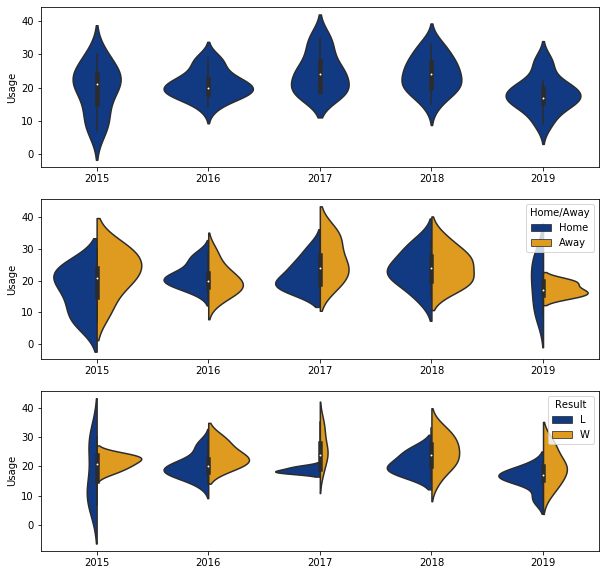

In [20]:
plt.figure(figsize=(10,10))
plt.title("Violin Plot of Todd Gurley's Usage")

plt.subplot(311)
sns.violinplot(x=df.index, y="Usage", data=df, color=rams_palette[0])

plt.subplot(312)
sns.violinplot(x=df.index, y="Usage", data=df, hue='Home/Away', split=True, palette= [rams_palette[0], rams_palette[3]])

plt.subplot(313)
sns.violinplot(x=df.index, y="Usage", data=df, hue='Result', split=True, palette= [rams_palette[0], rams_palette[3]])

[]

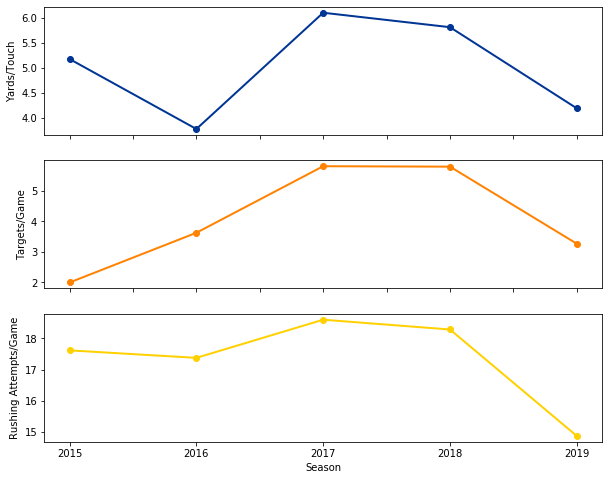

In [21]:
plt.figure(figsize=(10,8))

seasons = [2015,2016,2017,2018,2019]
usage = [250,275,300,325,350]
yds = [1000,1200,1400,1600,1800,2000,2200]

ax1 = plt.subplot(311)
ax1.plot(year_df['Yds/Touch'], marker = 'o', lw = 2, c = rams_palette[0])
plt.ylabel('Yards/Touch')

ax2 = plt.subplot(312)
ax2.plot(year_df['Tgt/G'], marker = 'o', lw = 2, c = rams_palette[1])
plt.ylabel('Targets/Game')

ax3 = plt.subplot(313)
ax3.plot(year_df['Att/G'], marker = 'o', lw = 2, c = rams_palette[2])
plt.xlabel('Season')
plt.ylabel('Rushing Attempts/Game')
plt.xticks(ticks=seasons)

ax1.set_xticklabels([])
ax2.set_xticklabels([])

It can be seen that, in the first 4 seasons of Todd Gurley's career, his rushing usage was fairly consistent; the clear change can be seen in where he was being used more as a receiver in his great seasons in 2017 and 2018.

In [22]:
year_df['TD%'] = year_df['TotalTD']/year_df['Touches']

Text(0.5, 1.0, 'Scoring')

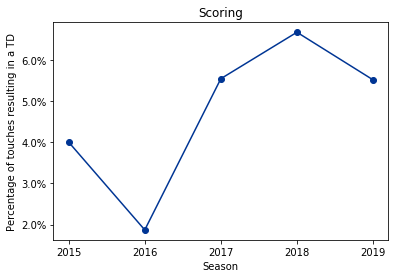

In [23]:
year_df['TD% temp'] = year_df['TD%']*100

ax = year_df['TD% temp'].plot(style='o-', c=rams_palette[0])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Season')
plt.ylabel('Percentage of touches resulting in a TD')
seasons = [2015,2016,2017,2018,2019]
plt.xticks(ticks=seasons)
plt.title('Scoring')

It can be seen that Todd Gurley managed to maintain a similar scoring efficiency to the previous 2 seasons despite the decreased workload. This shows that the **nature** of the usage that he was getting changed, as well as the reduction in volume.